In [1]:
import networkx as nx
import matplotlib.pyplot as plt

import dgl
import numpy as np
import torch as th
from dgl.nn import GATConv

In [2]:
# g = dgl.graph(([0,1,2,3,2,5], [1,2,3,4,0,3]))
# g = dgl.add_self_loop(g)

g = dgl.rand_graph(15, 30)

# specify some property of the graph!

g

Graph(num_nodes=15, num_edges=30,
      ndata_schemes={}
      edata_schemes={})

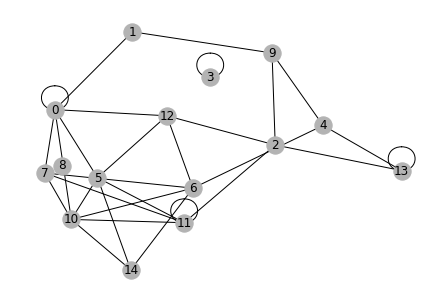

In [3]:
# g = dgl.to_homogeneous(hetero_graph, ndata=['feature'])

nx_G = g.to_networkx().to_undirected()
# Kamada-Kawaii layout usually looks pretty for arbitrary graphs
pos = nx.kamada_kawai_layout(nx_G)
nx.draw(nx_G, pos, with_labels=True, node_color=[[.7, .7, .7]])

In [4]:
feat = th.ones(15, 10) # (NODES, FEATURES)
gatconv = GATConv(10, 2, num_heads=3)
gatconv2 = GATConv(6, 1, num_heads=3)
h = gatconv(g, feat)
h_flat = h.flatten(1)
# print(h_flat.shape)
# print(feat.shape)
h2 = gatconv2(g, h_flat)

h2.mean(1)

# CAN PARAMETRIZE: 
# 1. EDGES,NODES (IN GENERAL GRAPH)
# 2. NUMBER OF HIDDEN LAYERS (AND F_IN, F_OUT)
# 3. NUMBER OF HEADS (BUT NOT EVERY CONV MODEL HAS IT)

DGLError: There are 0-in-degree nodes in the graph, output for those nodes will be invalid. This is harmful for some applications, causing silent performance regression. Adding self-loop on the input graph by calling `g = dgl.add_self_loop(g)` will resolve the issue. Setting ``allow_zero_in_degree`` to be `True` when constructing this module will suppress the check and let the code run.

In [ ]:
# nx_G = res.to_networkx().to_undirected()
# # Kamada-Kawaii layout usually looks pretty for arbitrary graphs
# pos = nx.kamada_kawai_layout(nx_G)
# # nx.draw(nx_G, pos, with_labels=True, node_color=[[.7, .7, .7]])

In [20]:
i = [12,23,34,5,2]
# i = [12,2]
print(i[0])
for idx in range(1,len(i)):
    print(i[idx-1],i[idx])


12
12 23
23 34
34 5
5 2
